In [31]:
%matplotlib inline

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [33]:
wine = load_wine()

In [34]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [35]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
XTrain, XTest, YTrain, YTest = train_test_split(wine.data, wine.target, test_size=0.3)

In [38]:
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(XTrain, YTrain)
rfc = rfc.fit(XTrain, YTrain)

In [39]:
score_c = clf.score(XTest, YTest)
score_r = rfc.score(XTest, YTest)

In [40]:
print("Single Tree: {}".format(score_c), "Random Forest: {}".format(score_r))

Single Tree: 0.9629629629629629 Random Forest: 0.9814814814814815


In [41]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [42]:
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)

In [43]:
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf, wine.data, wine.target, cv=10)

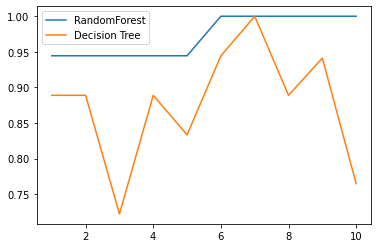

In [44]:
plt.plot(range(1, 11), rfc_s, label="RandomForest")
plt.plot(range(1, 11), clf_s, label="Decision Tree")
plt.legend()
plt.show()

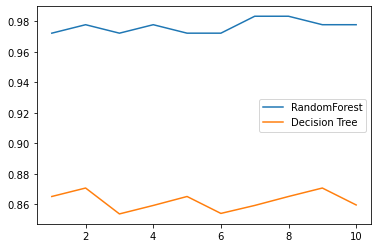

In [45]:
# 10 组交叉验证
rfc_l = []
clf_l = []

for i in range(10):
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf, wine.data, wine.target, cv=10).mean()
    clf_l.append(clf_s)
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    rfc_l.append(rfc_s)
    
plt.plot(range(1, 11), rfc_l, label="RandomForest")
plt.plot(range(1, 11), clf_l, label="Decision Tree")
plt.legend()
plt.show()

0.9944444444444445 12


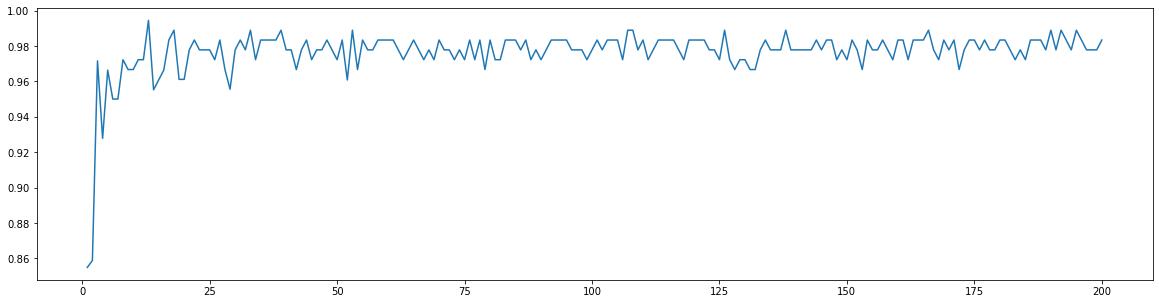

In [47]:
# n_estimators 的学习曲线
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1, n_jobs=-1)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa), superpa.index(max(superpa)))
plt.figure(figsize=[20, 5])
plt.plot(range(1, 201), superpa)
plt.show()

In [48]:
# 袋外数据测试
rfc = RandomForestClassifier(n_estimators=12, oob_score=True)
rfc = rfc.fit(wine.data, wine.target)

In [49]:
rfc.oob_score_

0.9606741573033708

In [51]:
rfc = RandomForestClassifier(n_estimators=12)
rfc = rfc.fit(XTrain, YTrain)
rfc.score(XTest,YTest)

0.9444444444444444

In [53]:
rfc.feature_importances_

array([0.05333488, 0.02403233, 0.02110744, 0.06699744, 0.03839684,
       0.00419952, 0.08808277, 0.01156836, 0.01346121, 0.17772419,
       0.15568537, 0.20060579, 0.14480386])

In [54]:
rfc.apply(XTest)

array([[ 4,  1,  3, 15,  7,  8, 10,  5, 13, 17, 11,  6],
       [ 6,  1,  6, 15,  5,  5,  4,  3, 13, 17, 11,  6],
       [ 3,  7, 11,  4,  4,  2,  5,  3,  5,  5,  5,  3],
       [ 4,  1,  6,  6,  3,  5,  3,  3, 13, 17, 11, 15],
       [ 9, 11,  3, 17, 17,  8, 10,  7, 16, 12, 11,  8],
       [14,  1,  3, 13,  7,  8, 19,  5, 22,  5,  5,  3],
       [ 4,  1,  3, 15,  7, 10, 10,  5, 13, 17, 11,  6],
       [14,  5, 14, 19, 18, 15, 19, 16, 24, 15, 15, 16],
       [14,  5, 14, 20, 18, 15, 19, 16, 24, 15, 15, 16],
       [14,  4, 14, 19, 13, 15, 19, 14, 24, 15, 15, 14],
       [14, 11, 14, 19,  4,  4,  4,  3, 24,  5, 15,  8],
       [14,  5, 14, 19, 18, 15, 19, 16, 24, 15, 15, 16],
       [ 3,  7, 11, 13,  4,  2,  5,  3,  5,  5,  5,  3],
       [ 9,  1,  3,  6,  7,  8, 10,  5,  9,  5, 11,  6],
       [14,  7, 11, 13,  4,  2,  5,  3, 24,  5,  5,  3],
       [ 9,  7, 11,  9, 17,  8, 10, 11,  5,  5,  5,  3],
       [14,  5, 14, 19, 18, 15, 19, 14, 24, 15, 15, 16],
       [14,  5, 14, 19, 18, 14,

In [55]:
rfc.predict(XTest)

array([1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 1, 0, 1, 0,
       0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 2, 0, 2, 2, 0, 2, 2, 0, 1,
       2, 2, 0, 0, 0, 1, 1, 1, 1, 1])

In [56]:
rfc.predict_proba(XTest)

array([[0.        , 1.        , 0.        ],
       [0.        , 0.75      , 0.25      ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.91666667, 0.08333333],
       [0.16666667, 0.66666667, 0.16666667],
       [0.25      , 0.41666667, 0.33333333],
       [0.        , 0.91666667, 0.08333333],
       [1.        , 0.        , 0.        ],
       [0.91666667, 0.08333333, 0.        ],
       [0.91666667, 0.08333333, 0.        ],
       [0.5       , 0.08333333, 0.41666667],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.91666667, 0.08333333],
       [0.16666667, 0.        , 0.83333333],
       [0.        , 0.41666667, 0.58333333],
       [1.        , 0.        , 0.        ],
       [0.91666667, 0.08333333, 0.        ],
       [0.25      , 0.75      , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.16666667, 0.75      , 0.08333333],
       [1.        , 0.        , 0.        ],
       [1.

In [59]:
# 基分类器准确率
import numpy as np
from scipy.special import comb

x = np.linspace(0, 1, 20)
y = []
for epsilon in np.linspace(0, 1, 20):
    E = np.array([comb(25, i) * (epsilon ** i) * ((1 - epsilon) ** (25 - i)) for i in range(13, 26)]).sum()
    y.append(E)

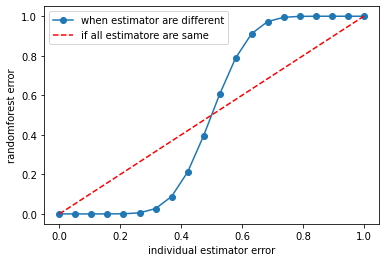

In [60]:
# 基分类器准确率小于 0.5 时候，bagging 反而变差
plt.plot(x, y, "o-", label="when estimator are different")
plt.plot(x, x, "--", color="red", label="if all estimatore are same")
plt.xlabel("individual estimator error")
plt.ylabel("randomforest error")
plt.legend()
plt.show()